#                                              PYTHON PROJECT_IU336,IU339


## Predictive Maintenance for Pumps (Shell Use-Case)

### Problem
- Oil & gas plants run pumps 24/7. Unexpected pump failures → production losses worth millions.
- Goal = Predict pump failures in advance using sensor data.

### Dataset
- Kaggle Pump Sensor Data (temperature, vibration, pressure, flow_rate, machine_status).
- Labels: 1 = Failure, 0 = Normal


In [8]:
import pandas as pd #Data manuplation and Data Freams
import numpy as np #Array and Numerical Computing
import matplotlib.pyplot as plt #Charts and Data Visiulization 
import matplotlib as sns

#ML Library sklearn
from sklearn.model_selection import train_test_split #Prepares your data for training & testing.
from sklearn.ensemble import RandomForestClassifier #The machine learning model (algorithm).
from sklearn.metrics import classification_report, confusion_matrix #Tools to evaluate how good your model is.
import pickle #Save & load Python objects (like trained ML models).

In [9]:
df = pd.read_csv("sensor.csv")  # place CSV in same folder
print(df.shape)
df.head()

(220320, 55)


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [10]:
# Convert status → binary (FAILURE=1, else 0)
df['failure'] = df['machine_status'].apply(lambda x: 1 if x=="FAILURE" else 0)

# Drop unused
df = df.drop(columns=['timestamp','machine_status'])

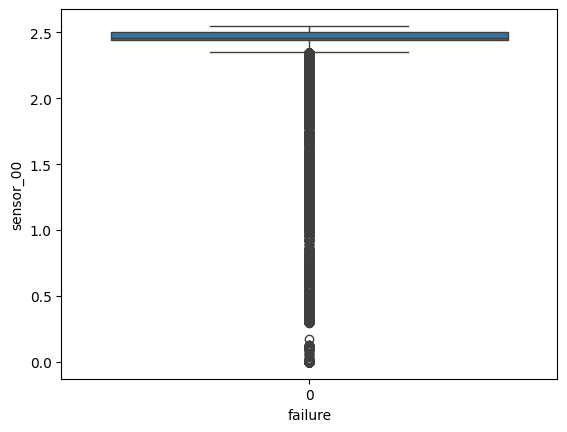

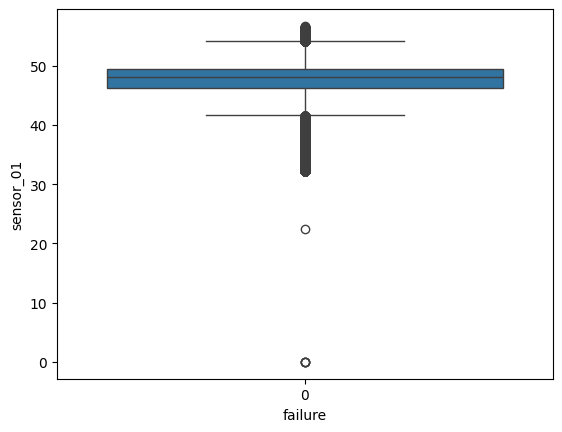

In [11]:
# ...existing code...
import matplotlib.pyplot as plt #Charts and Data Visiulization 
import seaborn as sns

# Check missing values
df.isnull().sum()

# Plot distributions
sns.boxplot(x="failure", y="sensor_00", data=df)
plt.show()

sns.boxplot(x="failure", y="sensor_01", data=df)
plt.show() #visualizing the relationship between pump failures and sensor readings

In [12]:
# Rolling averages
# Helps smooth out noise in sensor data and capture trends (like slowly increasing temperature before a pump fails).

df['temp_mean_5'] = df['sensor_00'].rolling(5).mean()
df['vib_mean_5']  = df['sensor_01'].rolling(5).mean() 

# Lag features
# Machine failures often depend not only on current values but also on how values change over time.

df['temp_lag1'] = df['sensor_00'].shift(1)
df['vib_lag1']  = df['sensor_01'].shift(1)

# Rolling averages and lag introduce NaN values for the first few rows.
df = df.fillna(0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44064

    accuracy                           1.00     44064
   macro avg       1.00      1.00      1.00     44064
weighted avg       1.00      1.00      1.00     44064



c:\Users\Om Panchal\OneDrive\Desktop\PythonMINI Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Axes: >

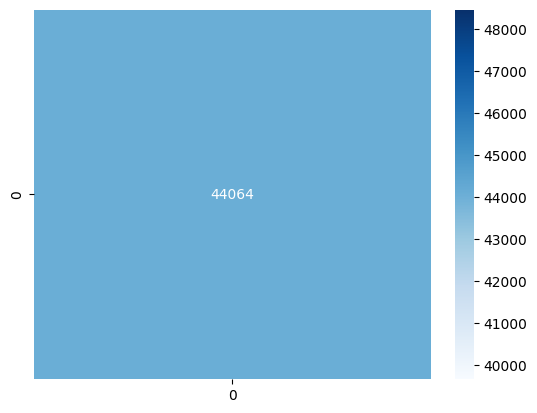

In [13]:
X = df.drop("failure", axis=1) # ALL SENSOR DATA AND FEATURES 
y = df["failure"] # TARGET  0 = NO FAILURE AND 1 = FAILURE 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) #80% training data (teach the model)
  #20% testing data (check model performance).

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train) 
#A Random Forest is an ensemble of decision trees.
#It learns patterns in sensor data to predict failures.
#n_estimators=100 → uses 100 decision trees.

y_pred = model.predict(X_test)
#predictions (failure = 1, no failure = 0) on the unseen test data.

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap="Blues")
#This helps visualize how many failures the model caught correctly vs how many it missed.

In [14]:
pickle.dump(model, open("pump_model.pkl", "wb")) #save your trained model to disk